# Telco Customer Churn

## About:
Churn rate is a measure of the number of indivisuals or items moving out of a group/organisation over a specific period. Hence it serves as an important metric for companies whose customers pay in a recurrent manner. It helps mostly subscription based companies to have a ballpark estimate of how many customers they will have sticking around over a period of time, visually the line of saturation in the graph developed gradually for a given time period. Note that this equilibrium may vary over years according to company strategies which are essentially ways to lure customers thus altering the churn rate to an ideal low. 

## Dataset Overview 
Each row represents a customer, each column contains customer’s attributes described on the column metadata.

The data set includes information about:

1. Customers who left within the last month – the column is called Churn

2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

4. Demographic info about customers – gender, age range, and if they have partners and dependents


## Objective: 


In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col='customerID')

In [4]:
# dataset.describe()

In [5]:
# dataset.info()

In [6]:
# dataset['TotalCharges'].describe

#### Fixing missing values


In [7]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace(" ", 0)
temp = dataset['TotalCharges'].values.reshape(-1,1).astype('float64')
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=0., strategy='mean', axis = 0)
imputer.fit(temp[:, :])
imputer.transform(temp[:, :])
dataset['TotalCharges'] = temp

/home/shreesh/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
# dataset['TotalCharges'].describe

In [9]:
print("Unique classes in every coloumn are as follows:")
for col in dataset:
    col_list = tuple(dataset[col].unique())
    if len(col_list) < 5:
        print('\n' + col)
        print(dataset[col].unique())

Unique classes in every coloumn are as follows:

gender
['Female' 'Male']

SeniorCitizen
[0 1]

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn
['No' 'Yes']


All the categorical data columns are encoded to aid data visualisation

In [10]:
# from sklearn.preprocessing import LabelEncoder
# label_this = LabelEncoder()
# for col in dataset:
#     if col == 'customerID':
#         pass
#     elif col == 'tenure':
#         pass
#     elif col == 'MonthlyCharges':
#         pass
#     elif col == 'TotalCharges':
#         pass
#     else:
#         dataset[col] = label_this.fit_transform(dataset[col])

## Legends
0  - customerID <br>
1  - gender <br>
2  - Partner <br>
3  - Dependent <br>
4  - tenure <br>
5  - PhoneService <br>
6  - MultipleLines <br>
7  - InternetService <br>
8  - OnlineSecurity <br>
9  - OnlineBackup <br>
10 - DeviceProtection <br>
11 - TechSupport <br>
12 - StreamingTV <br>
13 - StreamingMovie <br>
14 - Contract <br>
15 - PaperlessBilling <br>
16 - PaymentMethod <br>
17 - MonthlyCharges<br>
18 - TotalCharges <br>
19 - Churn<br>

In [13]:
gender = {
    'female': 0,
    'male': 1
}

Partner = {
    'yes': 1,
    'no': 0
}

MultipleLines = {
    'no_service': 1,
    'no': 0,
    'yes': 2
}

InternetService = {
    'dsl': 0,
    'fibre_optic': 1,
    'no': 2
}

Contract = {
    'm2m': 0,
    'one_year': 1,
    'two_year': 2
}

PaperlessBilling = {
    'yes': 1,
    'no': 0
}

PaymentMethod = {
    'electronic_check': 2,
    'mailed_check': 3,
    'bank_transfer': 0,
    'credit_card': 1
}
customerID = dataset.index
tenure = dataset['tenure']
MonthlyCharges = dataset['MonthlyCharges']
TotalCharges = dataset['TotalCharges']
StreamingMovie = StreamingTV = TechSupport = DeviceProtection = OnlineBackup = OnlineSecurity = MultipleLines
SeniorCitizen = Churn = Dependents = PhoneService = Partner

legends = [customerID, gender, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity,
          OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovie, Contract, PaperlessBilling, PaymentMethod, 
           MonthlyCharges, TotalCharges, Churn]

## Analysis
### 1. Churn Distribution

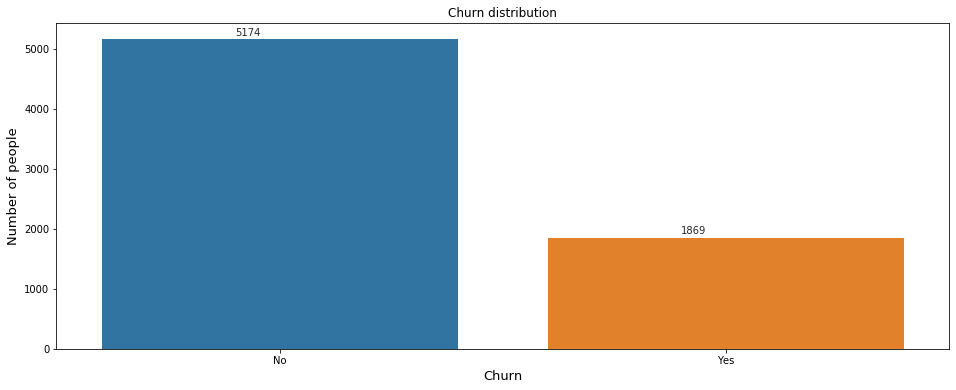

In [14]:
plt.figure(figsize = (16,6))
plt.title("Churn distribution")
sns.set_style('darkgrid')
plot = sns.countplot(x = 'Churn', data = dataset)
for p in plot.patches:
    plot.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
plt.ylabel("Number of people", fontsize = 13)
plt.xlabel("Churn", fontsize = 13)
plt.show()

***Inference: The number of people who ditched the company subscription is devastatingly high, perhaps excavating further into indivisual categories will help us get to the thicker roots of customer dissatisfaction***

### Plotting all categorical columns wrt churn = 0/1

In [ ]:
for i in enumerate(dataset.columns):
    plt.figure(figsize=(16,6))
    sns.set_style("darkgrid")
    if (i[1] == 'tenure'):
        continue
    else:
        plt.title("{} distribution".format(i[1].capitalize()))
        plot = sns.countplot(x = '{}'.format(i[1]), data=dataset, hue = dataset['Churn'])
        plt.show()
#         ans = input("Press 1 for inference and 0 to skip")
        if int(ans) == 1:
            print("idkkkk")
        else:
            continue
        print("\n")

In [179]:
# male = bye[bye['gender'] == 1]
# male_count = len(male)

# female = bye[bye['gender'] == 0]
# female_count = len(female)
# labels = ('male', 'female')
# pie = np.array([male_count, female_count])
# explode = (0.01, 0.01)
# fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
# plt.pie(pie, radius = 2, explode = explode, startangle= 90, shadow=True, autopct = '%5f%%')
# ax.legend(labels, loc = 'best')
# plt.show()

# print("Gender distribution")


1. ***Inference:*** Surprisingly, the gender ratio is pretty much the same, feels good to rule this out as a basis <br>
Further bifurcating the males to find whether the seniors or juniors opted out of the service

In [180]:
# jr_male = male[male['SeniorCitizen'] == 0]
# sr_male = male[male['SeniorCitizen'] == 1]
# jr_male_count = len(jr_male)
# sr_male_count = len(sr_male)
# print(jr_male_count)
# print(sr_male_count)

In [133]:
# jr_female = female[female['SeniorCitizen'] == 0]
# sr_female = female[female['SeniorCitizen'] == 1]
# jr_female_count = len(jr_female)
# sr_female_count = len(sr_female)

In [125]:
# print(female.shape[0] == jr_female_count + sr_female_count)
# print(male.shape[0] == jr_male_count + sr_male_count)
# print(bye.shape[0] == jr_female_count + sr_female_count + jr_male_count + sr_male_count)
# print(bye.shape[0] == male.shape[0] + female.shape[0])